<a href="https://colab.research.google.com/github/itissandeep98/StackOverFlow-Tag-Predictor/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [13]:
import numpy as np
import pandas as pd 
import csv,nltk,random,pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer,SnowballStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Plotting

In [5]:
def fit(n,preprocessed_df,yx_multilabel,model):
    size=int(0.8*n)
    X_train=preprocessed_df.head(size)
    vectorizer = CountVectorizer(min_df=0.0009, max_features=13000,tokenizer = lambda x: x.split(), ngram_range=(1,4))
    vectorizer.fit(preprocessed_df['question'])
    X_test=preprocessed_df.tail(preprocessed_df.shape[0] - size)
    Y_train = yx_multilabel[0:size,:]
    Y_test = yx_multilabel[size:preprocessed_df.shape[0],:]
    x_train_multilabel = vectorizer.transform(X_train['question'])
    x_test_multilabel = vectorizer.transform(X_test['question'])

    clf = OneVsRestClassifier(model)

    clf.fit(x_train_multilabel, Y_train)
    y_pred = clf.predict(x_test_multilabel)

    return metrics.accuracy_score(Y_test,y_pred),metrics.f1_score(Y_test, y_pred, average = 'macro'),metrics.f1_score(Y_test, y_pred, average = 'micro')
 

In [9]:
def tags_to_consider(n,multilabel_y):
    tag_i_sum = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(tag_i_sum)), key=lambda i: tag_i_sum[i], reverse=True)
    yn_multilabel=multilabel_y[:,sorted_tags_i[:n]]
    return yn_multilabel

In [16]:
def vectorize(n,tagsize):
  preprocessed_df=pd.read_csv("/content/drive/MyDrive/MlProject/preprocessed_data/preprocessed_"+str(n)+"k.csv")
  preprocessed_df["tag_count"] = preprocessed_df["Tags"].apply(lambda text: len(text.split(" ")))
  vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
  multilabel_y = vectorizer.fit_transform(preprocessed_df['Tags'])
  yx_multilabel = tags_to_consider(tagsize,multilabel_y)
  return preprocessed_df, yx_multilabel

In [26]:
def plot_metrics(data_size,model,title):
  acc_list=[]
  macro_list=[]
  micro_list=[]
  for tagsize in range(50,200,20):
    print(tagsize)
    x,y=vectorize(data_size,tagsize)
    acc,macro,micro,hamm=fit(data_size,x,y,model)
    acc_list.append(acc)
    macro_list.append(macro)
    micro_list.append(micro)
  plt.plot(range(50,200,20),acc_list,label="Accuracy")
  plt.plot(range(50,200,20),macro_list,label="Macro F1 score")
  plt.plot(range(50,200,20),micro_list,label="Micro F1 score")
  plt.legend()
  plt.title(title)
  plt.xlabel("Tag Sizes")
  plt.ylabel("Metric")
  plt.show()


In [27]:
warnings.filterwarnings("ignore")
models=[SGDClassifier(alpha=0.001,penalty='l2'),BernoulliNB(),SGDClassifier(loss='log',alpha=0.01, penalty='l1'),DecisionTreeClassifier()]

50
70
90
110
130
150
170
190


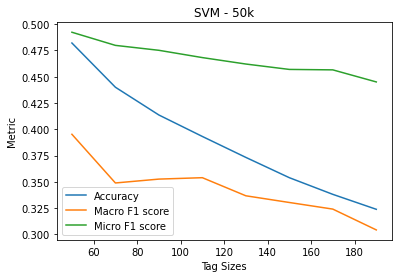

In [28]:
plot_metrics(50000,models[0],"SVM - 50k")

50
70
90
110
130
150
170
190


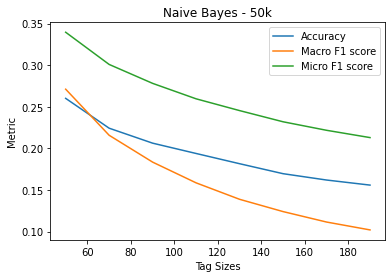

In [29]:
plot_metrics(50000,models[1],"Naive Bayes - 50k")

50
70
90
110
130
150
170
190


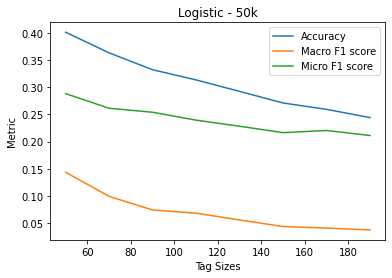

In [30]:
plot_metrics(50000,models[2],"Logistic - 50k")

50
70
90
110
130
150
170
190


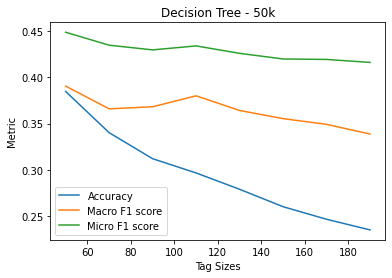

In [31]:
plot_metrics(50000,models[3],"Decision Tree - 50k")